## Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

#### Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

#### Weather data observations

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

#### FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

## DATA COLLECTION AND UNDERSTANDING

* I used a dataset on **Algerian Forest Fires** from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from **June 2012 to September 2012**. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.


* As per the Task given i choose regression problem to predict fire weather index

## DATA EXPLORATION

* In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.


Below are tasks to be performed in EDA:

**1. Importing Libraries**


**2. Data Cleaning for EDA Report**

**3. Exploratory Data Analysis (EDA) on all Features**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
forest = pd.read_csv("./Dataset/Algerian_forest_fires_dataset_UPDATE.csv", header=1)
forest.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
## shape of the dataset
forest.shape

(246, 14)

In [4]:
## type of feature data types
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


<AxesSubplot:>

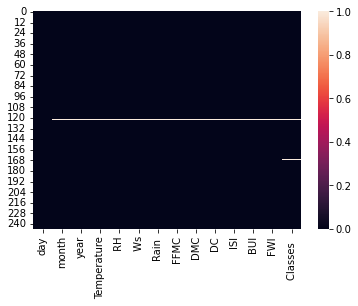

In [5]:
## checking for missing values
sns.heatmap(forest.isnull())

In [6]:
forest[forest.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


### Observations

- There are 246 datapoints with 11 independent variable and 1 dependent variable, Fire Weather Index.
- There are 2 datapoints with missing values in our dataset.

### Data Cleaning

In [7]:
## our dataset has 2 regions Bejaia Region till 122 and Sidi-Bel Abbes Region from 123 till end
## creating a new column and for region Bejaija assining 0 for region 2 assigning Sidi-Bel

forest.loc[:122,'Region']=0
forest.loc[122:,"Region"]=1

df = forest

## converting the region column to int
df['Region'] = df['Region'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [9]:
## we still have row 122 and 123 which are headings and should be removed
df[121:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [10]:
## dropping all empty rows
df = df.dropna().reset_index(drop=True)
## dropping row which has heading at index 122
df = df.drop(122).reset_index(drop=True)

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
## removing extra spaces from column names
df.columns=df.columns.str.strip()

In [12]:
## removing extra spaces from Classes categories
df['Classes']=df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [13]:
## converting columns to int
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [14]:
## converting columns to float
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


### Observations

- Fill missing value with specified region.
- Dropped datapoints which were heading in between the dataset.
- Created a new feature Region, encoded region Bejaia to 0 and Sidi-Bel Abbes to 1 and converted it as integer values.
- Removed all extra spaces from the column headings.
- Removed all extra spaces from Classes categories.
- Converted features 'day', 'month','year','Temperature','RH'(Relative Humidity),'Ws'(Wind Speed) to integer.
- Converted features 'Rain','FFMC'(Fine Fuel Moisture Code),'DMC'(Duff Moisture Code),'DC'(Drought Code),'ISI'(Initial Spread Index),'BUI'(Buildup Index),'FWI'(Fire Weather Index) to float.

In [16]:
#df.to_csv("Algerian_forest_fires_cleaned.csv")

### EDA

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [18]:
## dropping day month and year columns
df_copy = df.drop(['day','month','year'],axis=1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [19]:
## Encoding Classes category not fire to 0 and fire to 1
df_copy['Classes'] = np.where(df['Classes']=='not fire',0,1)

In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 18.2 KB


### Splitting the Data in Test and Training set

In [21]:
## splitting the data in independent and dependent fields
y_dependent = df_copy['FWI']

In [22]:
x_independent = df_copy.drop('FWI',axis=1)

In [23]:
x_independent.shape, y_dependent.shape

((243, 11), (243,))

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x_independent,y_dependent,train_size=0.75, random_state=35)

In [25]:
(x_train.shape,y_train.shape)

((182, 11), (182,))

In [26]:
(x_test.shape,y_test.shape)

((61, 11), (61,))

### Correlation Coefficient

In [27]:
## setting the theme
sns.set_style('whitegrid',{'grid.color':'whitesmoke'})

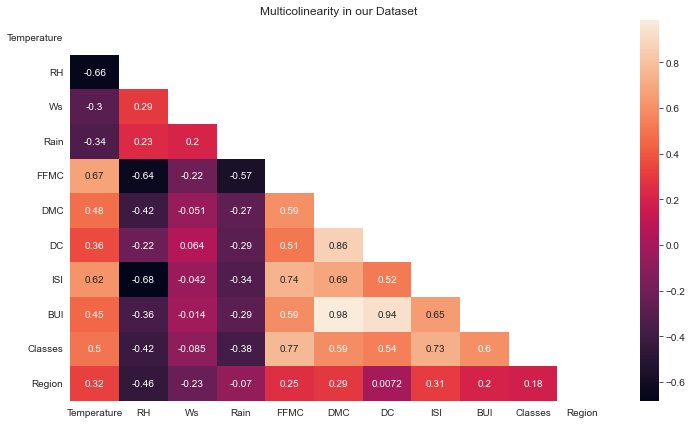

In [28]:
msk = np.triu(np.ones_like(x_train.corr(), dtype=bool))
plt.figure(figsize=(12,7))
sns.heatmap(x_train.corr(),mask=msk, annot=True)
plt.title('Multicolinearity in our Dataset')
plt.show()

### Listing out features which has multicolinearity

In [29]:
lst = set()
corr_mat = x_train.corr()
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if (corr_mat.iloc[i,j] >=0.6) or (corr_mat.iloc[i,j]<=-0.6):
            lst.add(corr_mat.columns[i])

In [30]:
lst

{'BUI', 'Classes', 'DC', 'FFMC', 'ISI', 'RH'}

In [31]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [32]:
corr_features = correlation(x_train, 0.8)

In [33]:
corr_features

{'BUI', 'DC'}

### Dropping multicoliear features

In [34]:
x_train.drop(corr_features, axis=1,inplace=True)

In [35]:
x_test.drop(corr_features, axis=1,inplace=True)

### Scaling our dataset

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [38]:
pd.DataFrame(x_train_scale, columns=x_train.columns).drop(['Classes','Region'],axis=1)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI
0,0.758335,-1.654333,-0.156515,-0.354309,0.999802,2.997801,1.828060
1,0.225451,0.174140,-0.156515,-0.308315,0.233773,-0.176657,-0.468661
2,-0.040991,-0.029023,0.873092,-0.308315,0.233773,-0.510382,-0.346495
3,-0.040991,0.851353,-0.499718,-0.354309,0.591731,-0.119679,0.117736
4,-0.307433,0.377304,-0.499718,-0.354309,0.520139,-0.192936,-0.028863
...,...,...,...,...,...,...,...
177,0.225451,1.054516,0.529890,-0.354309,0.140705,-0.803409,-0.493094
178,2.090545,-1.925218,-0.499718,-0.354309,1.085711,-0.298751,2.218992
179,-1.639643,-0.909399,-3.245339,0.565581,-1.205214,-0.209215,-1.006192
180,-0.840317,1.799450,-0.842921,-0.032348,-3.009317,-1.039458,-1.152791


### Visualisation

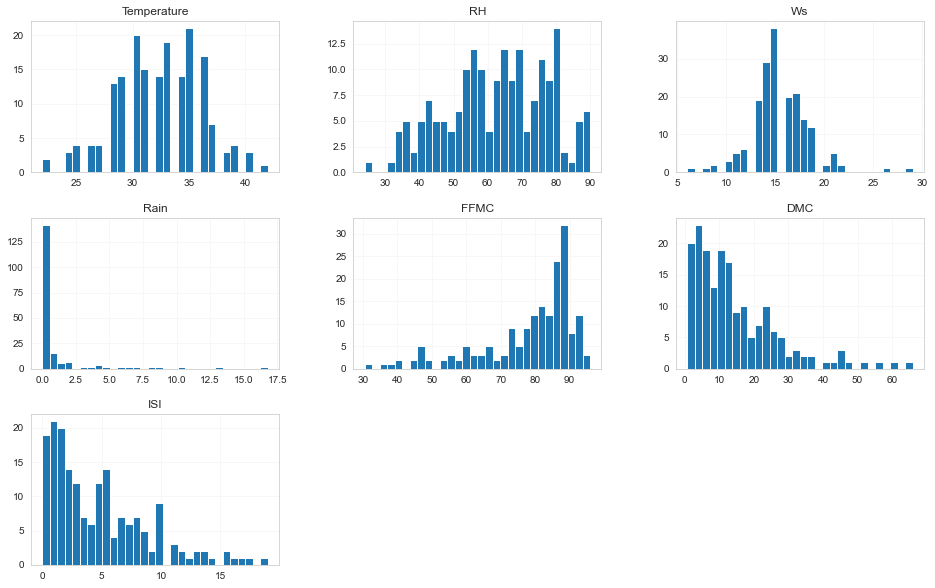

In [39]:
x_train.iloc[:,:-2].hist(bins=30,figsize=(16,10))
plt.show()

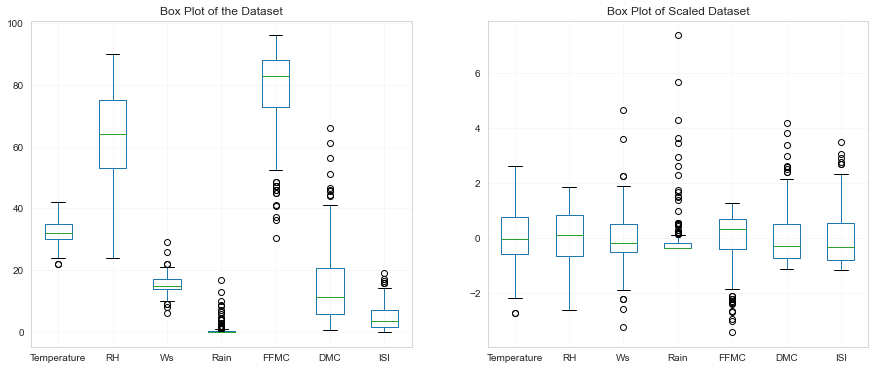

In [40]:
## Boxplot
plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
x_train.drop(['Classes','Region'], axis=1).boxplot()
plt.title("Box Plot of the Dataset")


plt.subplot(122)
pd.DataFrame(x_train_scale, columns=x_train.columns).drop(['Classes','Region'], axis=1).boxplot()
plt.title("Box Plot of Scaled Dataset")
plt.show()

### Observation

- Scaling the data makes it easier to identify outliers in our dataset, along with median, min, max and quartile ranges.
- Features Rain, FFMC, DMC, WS and ISI have outliers.

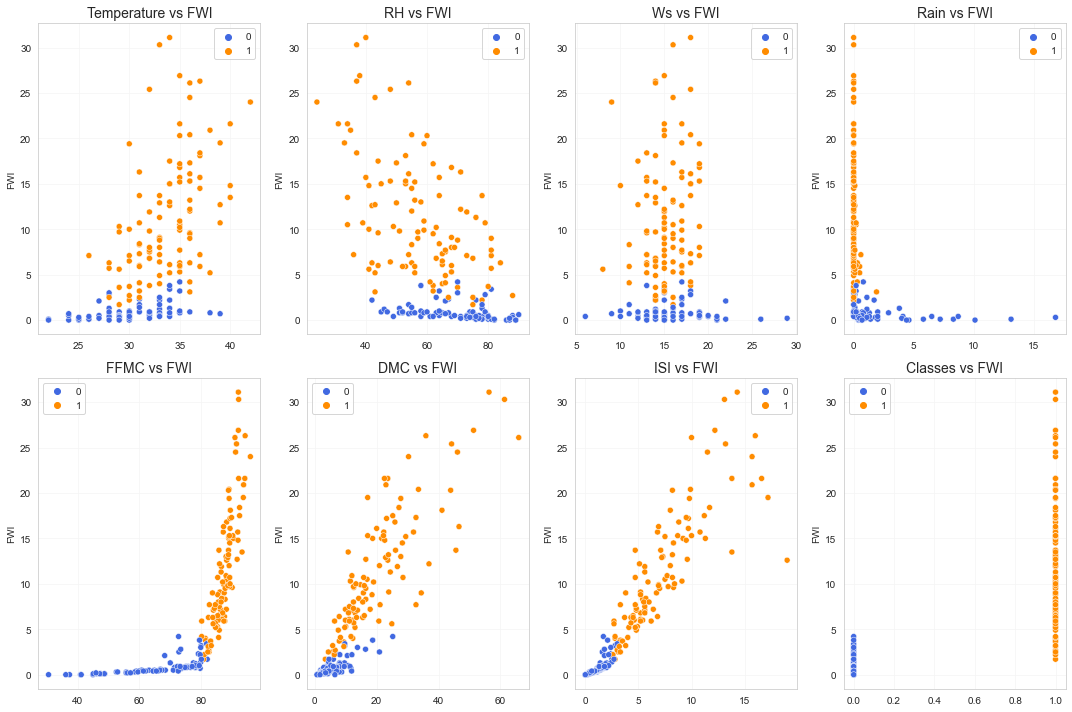

In [41]:
plt.subplots(2,4, figsize=(15,10))
k=0
colr = {0:'royalblue',1:'darkorange'}
df_FWI = pd.concat([x_train.reset_index(drop=True),y_train.reset_index(drop=True)],axis=1)
for i in df_FWI.drop(['FWI','Region'],axis=1):
    k=k+1
    plt.subplot(2,4,k)
    sns.scatterplot(x=i, y='FWI', hue='Classes' ,data=df_FWI, palette=colr)
    plt.legend()
    plt.xlabel("")
    plt.title("{} vs FWI".format(i), fontsize=14)
    plt.tight_layout()

plt.show()

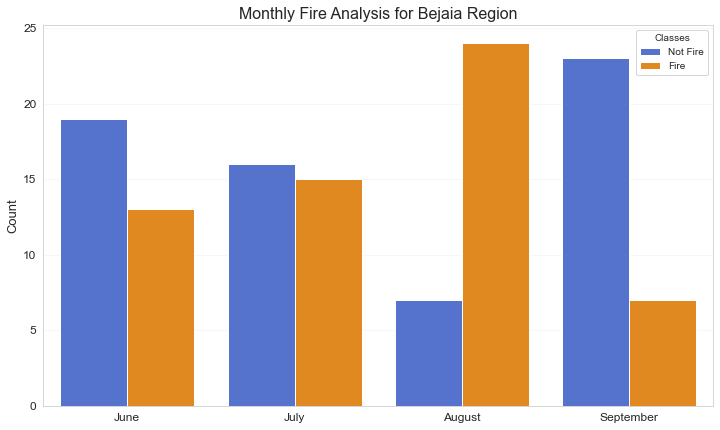

In [42]:
colr = {"not fire":'royalblue', 'fire':'darkorange' }
plt.figure(figsize=(12,7))
sns.countplot(x=df.loc[:123,'month'], hue=df.loc[:123,'Classes'], palette=colr)
plt.legend(['Not Fire','Fire'], title='Classes')
plt.xticks(np.arange(4),['June','July','August','September'], fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("")
plt.ylabel('Count', fontsize=13)
plt.title("Monthly Fire Analysis for Bejaia Region", fontsize=16)
plt.show()

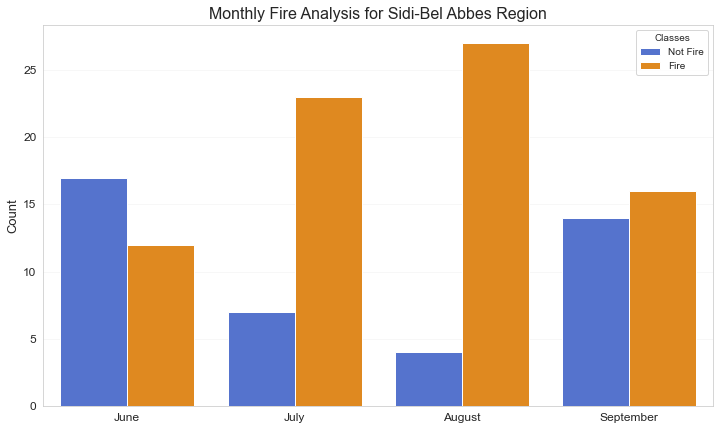

In [43]:
colr = {"not fire":'royalblue', 'fire':'darkorange'}
plt.figure(figsize=(12,7))
sns.countplot(x=df.loc[123:,'month'], hue=df.loc[123:,'Classes'], palette=colr)
plt.legend(['Not Fire','Fire'], title='Classes')
plt.xticks(np.arange(4),['June','July','August','September'], fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("")
plt.ylabel('Count', fontsize=13)
plt.title("Monthly Fire Analysis for Sidi-Bel Abbes Region", fontsize=16)
plt.show()

In [44]:
def Barplot(feature, xlabel):
    by_feature = x_train.groupby(feature, as_index=False)['Classes'].sum()
    plt.figure(figsize=(14,8))
    ax=sns.barplot(x=feature,y='Classes' ,data=by_feature, estimator=sum)
    plt.bar_label(ax.containers[0])
    plt.xlabel(xlabel,fontsize=13)
    plt.ylabel("Fire Count", fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title("{} vs Fire Count".format(feature), fontsize=16)

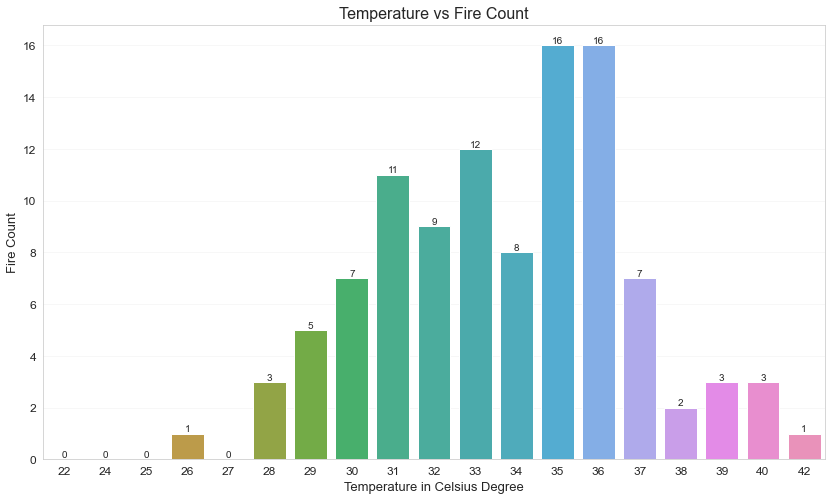

In [45]:
## Plot for temperature
Barplot('Temperature', 'Temperature in Celsius Degree')

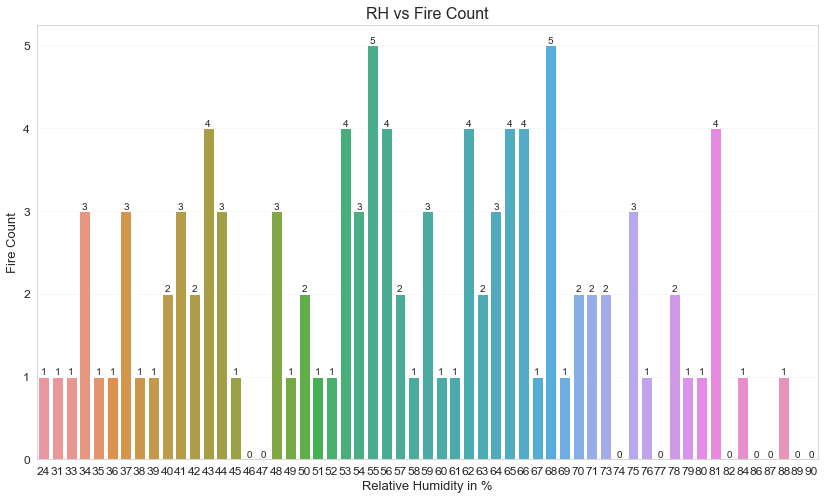

In [46]:
## plot for relative humidity
Barplot('RH','Relative Humidity in %')

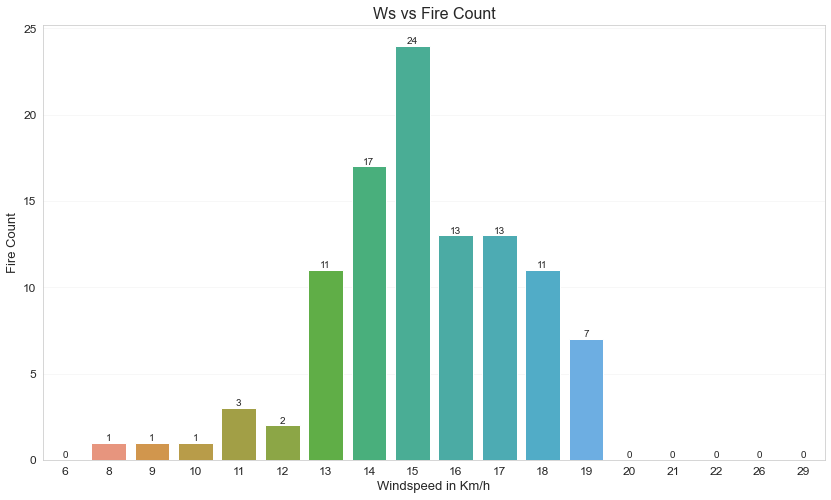

In [47]:
Barplot("Ws",'Windspeed in Km/h')

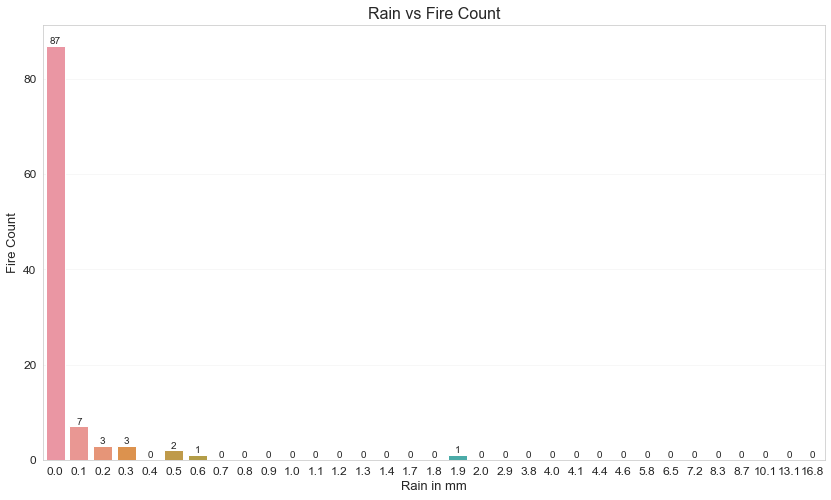

In [48]:
Barplot('Rain', 'Rain in mm')

<AxesSubplot:xlabel='FFMC', ylabel='Count'>

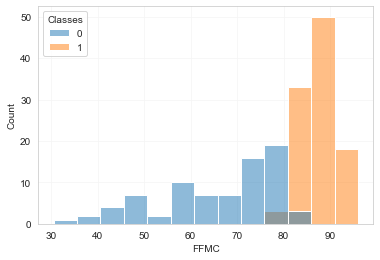

In [49]:
sns.histplot(x='FFMC',data=x_train, hue='Classes')

In [50]:
## creating a new dataframe for FWI System Components Report
df_classes = x_train.loc[:,['FFMC', 'DMC', 'ISI', 'Classes','Region']]
df_classes['Classes'] = np.where(df_classes['Classes']==0,'Not Fire','Fire')
df_classes['Region'] = np.where(df_classes['Region']==0,'Bejaia','Sidi-Bel Abbes')


In [51]:
def FWIplot(feature):
    colr = {"Not Fire":'royalblue', 'Fire':'darkorange'}
    ax = sns.FacetGrid(data=df_classes, col='Classes',row='Region', height=3.8, aspect=1.4, 
                   hue='Classes', col_order=['Not Fire','Fire'], row_order=['Bejaia','Sidi-Bel Abbes'],
                      palette=colr)
    ax.map_dataframe(sns.histplot, x=feature, binwidth=5)
    ax.set_titles(size=14)
    ax.fig.subplots_adjust(top=0.9)
    ax.fig.suptitle('Region and Class based distribution of {} Index'.format(feature), size=18)
    plt.show()

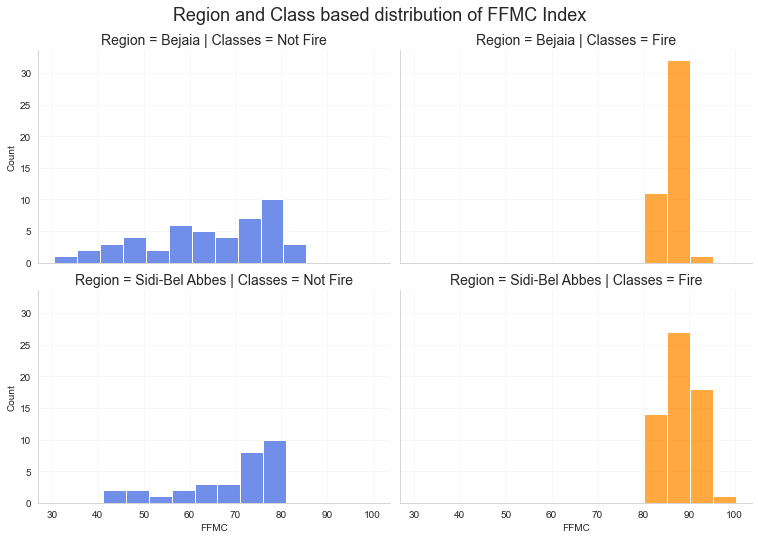

In [52]:
FWIplot('FFMC')

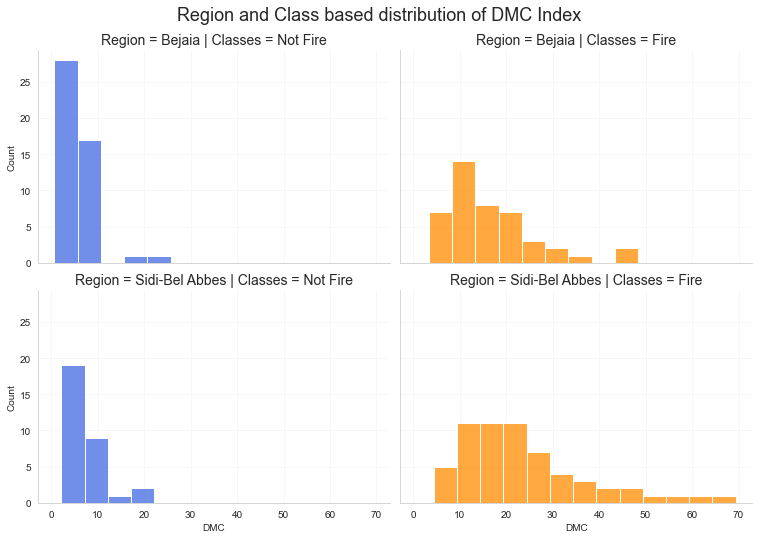

In [53]:
FWIplot('DMC')

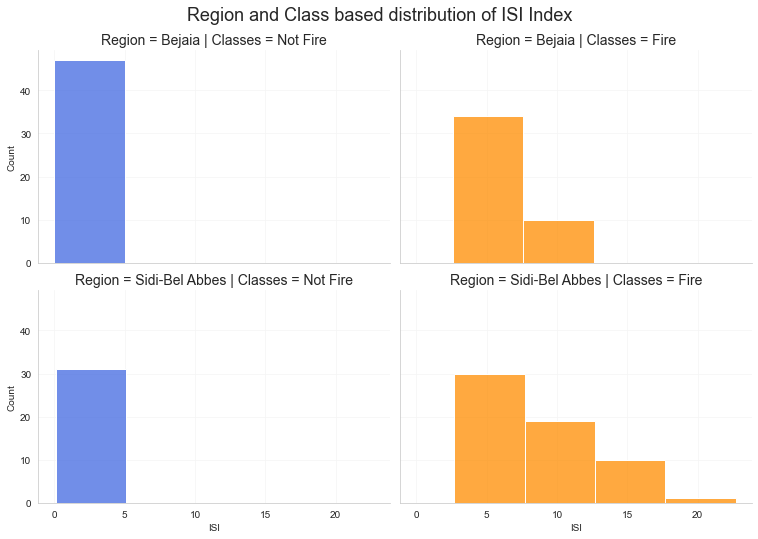

In [54]:
FWIplot('ISI')

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
## instance of LinearRegression
regressor = LinearRegression()

##fitting the data
regressor.fit(x_train_scale,y_train)

LinearRegression()

In [57]:
## printing linear equation
def linear_equation(regressor):   
    equ = ""
    lin_coeff = {i:j for i,j in zip(x_train.columns, np.round(regressor.coef_,5))}
    for i,j in lin_coeff.items():
        if j>=0:
            equ = equ+"+ {}*{} ".format(str(j),i)
        else :
            equ  =equ+"- {}*{} ".format(str(j)[1:],i)

    if list(lin_coeff.values())[0]>=0:
        return (equ[1:], lin_coeff)
    else:
        return (equ,lin_coeff)

In [58]:
## calling linear equation function to get the Ridge Regression equation
equation, coeff = linear_equation(regressor)
print(equation)

 0.00761*Temperature - 0.19942*RH + 0.11141*Ws - 0.0405*Rain - 0.76813*FFMC + 3.57888*DMC + 4.48335*ISI + 0.41167*Classes - 0.38106*Region 


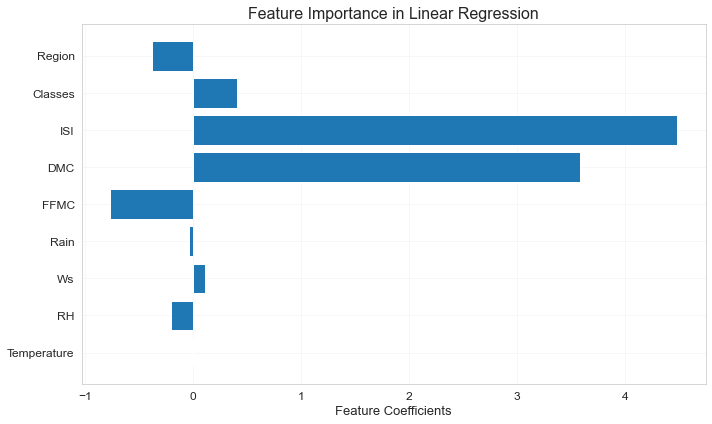

In [59]:
## plotting feature importance for Lass Regression

plt.figure(figsize=(10,6))
plt.barh(list(coeff.keys()),list(coeff.values()) )
plt.xlabel("Feature Coefficients", fontsize=13)
plt.title("Feature Importance in Linear Regression", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [60]:
## predicting for test values
linear_reg_pred = np.round(regressor.predict(x_test_scale),2)

In [61]:
## checking model accuracy
## mae
lin_reg_mae = round(mean_absolute_error(y_test,linear_reg_pred),3)
## mse
lin_reg_mse = round(mean_squared_error(y_test, linear_reg_pred),3)
## rmse
lin_reg_rmse = round(np.sqrt(lin_reg_mse),3)
## r2
lin_reg_r2 = round(r2_score(y_test, linear_reg_pred),3)

print("MAE is {} \nMSE is {} \nRMSE is {} \nR2 is {}".format(lin_reg_mae, lin_reg_mse, lin_reg_rmse, lin_reg_r2))

MAE is 0.729 
MSE is 1.129 
RMSE is 1.063 
R2 is 0.981


### Lasso Regression

In [62]:
## instance of lasso rgressor
lasso = Lasso()

## fitting the model
lasso.fit(x_train_scale, y_train)

Lasso()

In [63]:
## calling linear equation function to get the Ridge Regression equation
equation_lasso,coeff_lasso=linear_equation(lasso)
equation_lasso

' 0.0*Temperature + -0.0*RH + 0.0*Ws + -0.0*Rain + 0.0*FFMC + 2.85036*DMC + 3.74779*ISI + 0.0*Classes + 0.0*Region '

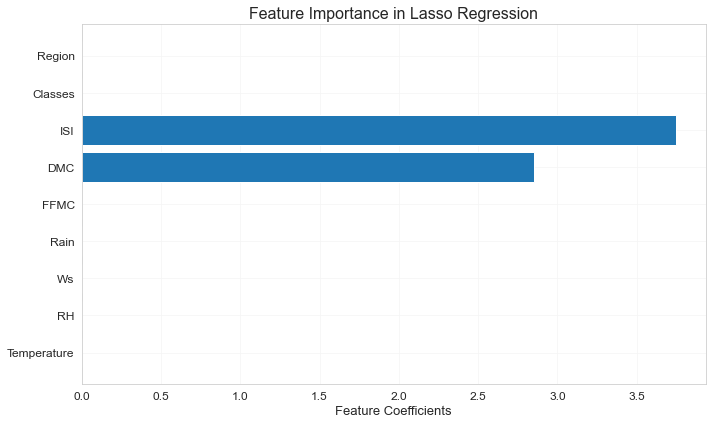

In [64]:
## plotting feature importance for Lass Regression

plt.figure(figsize=(10,6))
plt.barh(list(coeff_lasso.keys()),list(coeff_lasso.values()))
plt.xlabel("Feature Coefficients", fontsize=13)
plt.title("Feature Importance in Lasso Regression", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

In [65]:
## predicting on test values
lasso_pred=lasso.predict(x_test_scale)

In [66]:
## checking model accuracy
# MAE
lasso_mae = round(mean_absolute_error(y_test, lasso_pred),3)
## MSE
lasso_mse = round(mean_squared_error(y_test, lasso_pred),3)
## RMSE
lasso_rmse = round(np.sqrt(lasso_mse),3)
## R2
lasso_r2 = round(r2_score(y_test, lasso_pred),3)

print("MAE is {} \nMSE is {} \nRMSE is {} \nR2 is {}".format(lasso_mae, lasso_mse, lasso_rmse, lasso_r2))

MAE is 1.396 
MSE is 3.654 
RMSE is 1.912 
R2 is 0.94


### Ridge Regression

In [67]:
## creating an instance of Ridge regression
ridge = Ridge()

In [68]:
## fitting the model
ridge.fit(x_train_scale, y_train)

Ridge()

In [69]:
## calling linear equation function to get the Ridge Regression equation
equation_ridge, coeff_ridge = linear_equation(ridge)
equation_ridge

' 0.01603*Temperature - 0.21938*RH + 0.12652*Ws - 0.03472*Rain - 0.7285*FFMC + 3.56336*DMC + 4.40529*ISI + 0.43412*Classes - 0.37236*Region '

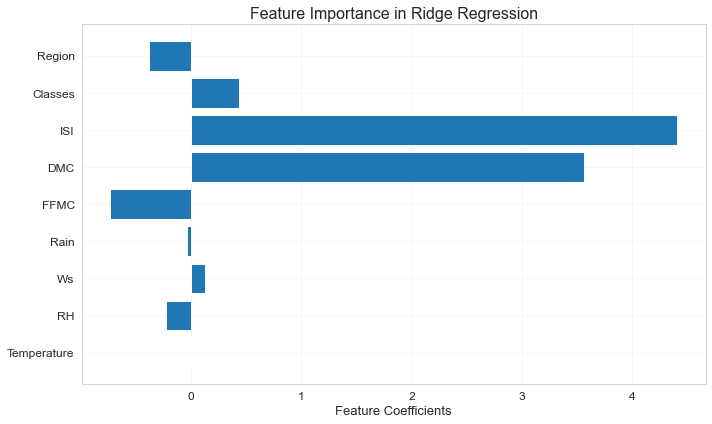

In [70]:
## plotting feature importance for Ridge Regression
plt.figure(figsize=(10,6))
plt.barh(list(coeff_ridge.keys()),list(coeff_ridge.values()))
plt.xlabel("Feature Coefficients", fontsize=13)
plt.title("Feature Importance in Ridge Regression", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

In [71]:
## predicting values
ridge_pred = ridge.predict(x_test_scale)

In [72]:
## checking model accuracy
# MAE
ridge_mae = round(mean_absolute_error(y_test, ridge_pred),3)
## MSE
ridge_mse = round(mean_squared_error(y_test, ridge_pred),3)
## RMSE
ridge_rmse = round(np.sqrt(ridge_mse),3)
## R2
ridge_r2 = round(r2_score(y_test, ridge_pred),3)

print("MAE is {} \nMSE is {} \nRMSE is {} \nR2 is {}".format(ridge_mae, ridge_mse, ridge_rmse, ridge_r2))

MAE is 0.748 
MSE is 1.173 
RMSE is 1.083 
R2 is 0.981


### Elastic Net

In [73]:
## Creating instance of elastic net
elastinet = ElasticNet()
## fitting the model
elastinet.fit(x_train_scale, y_train)

ElasticNet()

In [74]:
equation_elastic, coeff_elastic = linear_equation(elastinet)
print(equation_elastic)

 0.20274*Temperature - 0.36454*RH + 0.0*Ws + -0.0*Rain + 0.3234*FFMC + 2.28864*DMC + 2.29208*ISI + 0.80013*Classes + 0.0*Region 


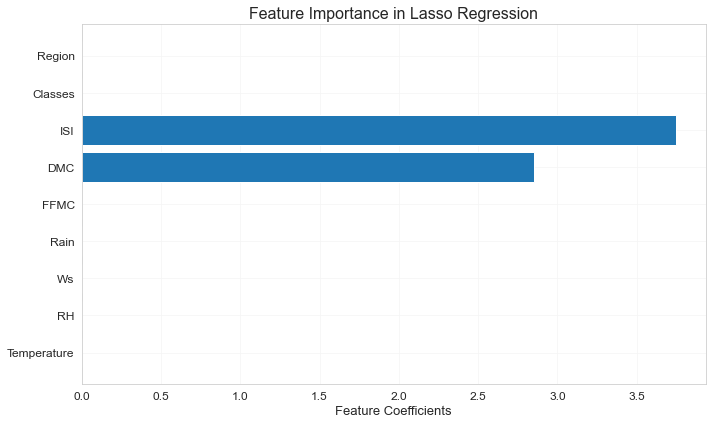

In [75]:
## plotting feature importance for Lass Regression

plt.figure(figsize=(10,6))
plt.barh(list(coeff_lasso.keys()),list(coeff_lasso.values()))
plt.xlabel("Feature Coefficients", fontsize=13)
plt.title("Feature Importance in Lasso Regression", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

In [76]:
## predicting the values for elastic net
elastic_pred = elastinet.predict(x_test_scale)
## checking model accuracy
## mae
elastic_mae = round(mean_absolute_error(y_test, elastic_pred),3)
## mse
elastic_mse = round(mean_squared_error(y_test, elastic_pred),3)
## rmse
elastic_rmse = round(np.sqrt(elastic_mse),3)
## R2
elastic_r2 = round(r2_score(y_test, elastic_pred),3)

print("MAE is {} \nMSE is {} \nRMSE is {} \nR2 is {}".format(elastic_mae, elastic_mse, elastic_rmse, elastic_r2))

MAE is 2.03 
MSE is 7.687 
RMSE is 2.773 
R2 is 0.874


In [77]:
print("Linear Regression : ",lin_reg_mae, lin_reg_r2)
print("Lasso : ", lasso_mae, lasso_r2)
print('Ridge : ', ridge_mae, ridge_r2)
print('Elastic Net : ', elastic_mae, elastic_r2)

Linear Regression :  0.729 0.981
Lasso :  1.396 0.94
Ridge :  0.748 0.981
Elastic Net :  2.03 0.874


### Pickling

Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script

In [78]:
import pickle
pickle.dump(scaler,open('Forest_Fire_scaler.pkl','wb'))
pickle.dump(ridge,open('Forest_Fire_Ridge.pkl','wb'))

In [79]:
model_elasticnet=pickle.load(open('Forest_Fire_Ridge.pkl','rb'))

In [80]:
model_elasticnet.predict(x_test_scale)

array([ 1.91894853e+01,  3.07601879e+00,  4.39968464e-01,  7.29980799e-01,
        2.00827712e+01,  6.68460254e+00,  1.96013224e+01,  1.87000313e+01,
        1.04002568e+01,  1.08345076e+01,  3.35894795e+00,  1.02497889e+01,
        5.06589131e+00, -9.29842171e-02,  5.88827566e+00, -3.71541332e-01,
        4.63941518e+00, -3.73862391e-01,  1.27424974e+01,  2.02338780e+01,
        3.51760407e+00, -1.90672454e-01,  1.36831147e+00,  2.84465308e+00,
        3.94705219e+00,  7.76114712e+00, -1.30347050e-01,  2.88505276e+01,
        9.74815812e+00,  4.36181132e-01, -7.08119161e-03,  1.72420465e+01,
        5.64553639e-02,  1.34629319e+00,  1.34466577e+01,  5.25256286e+00,
        4.52497692e+00,  3.62173978e+00,  6.16400841e+00,  1.12533287e+01,
        1.31807687e+01,  1.76489663e+00,  1.42929266e+01,  1.63644186e+01,
       -5.15007972e-01,  9.87597429e+00, -5.41244196e-01, -4.71282630e-01,
        1.42139148e+00,  1.33373070e+00,  1.96190075e+00,  5.24825821e+00,
       -1.09928100e+00,  